# Soda Cloud Data Analysis

This notebook analyzes the data extracted from Soda Cloud API, dynamically finding the latest files without hardcoding timestamps.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from datetime import datetime
import sys

# Add the scripts directory to the path to import our utility functions
sys.path.append('scripts')
from soda_dump_api import SodaCloudDump

# Set up plotting style
plt.style.use('default')
try:
    sns.set_style("whitegrid")
except:
    pass  # Continue without seaborn styling if not available

print("📊 Soda Cloud Data Analysis Notebook")
print("=" * 40)


📊 Soda Cloud Data Analysis Notebook


In [2]:
# Dynamically find the latest files with enhanced error handling
output_dir = 'soda_dump_output'

print("🔍 Finding latest data files...")
print("=" * 40)

# Check if output directory exists
if not os.path.exists(output_dir):
    print(f"❌ Output directory '{output_dir}' does not exist!")
    print("💡 Run 'make soda-dump' first to extract data from Soda Cloud")
    datasets_file = None
    checks_file = None
else:
    print(f"✅ Output directory found: {output_dir}")
    
    # Find latest datasets file
    print("\n📊 Looking for datasets file...")
    datasets_file = SodaCloudDump.get_latest_datasets_file(output_dir)
    if datasets_file:
        file_size = os.path.getsize(datasets_file)
        modified_time = datetime.fromtimestamp(os.path.getmtime(datasets_file))
        print(f"✅ Found datasets file: {os.path.basename(datasets_file)}")
        print(f"   📁 Full path: {datasets_file}")
        print(f"   📅 Modified: {modified_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"   📏 Size: {file_size:,} bytes")
    else:
        print("❌ No datasets file found")
        print("💡 Run 'make soda-dump' first to extract data from Soda Cloud")

    # Find latest checks file
    print("\n🔍 Looking for checks file...")
    checks_file = SodaCloudDump.get_latest_checks_file(output_dir)
    if checks_file:
        file_size = os.path.getsize(checks_file)
        modified_time = datetime.fromtimestamp(os.path.getmtime(checks_file))
        print(f"✅ Found checks file: {os.path.basename(checks_file)}")
        print(f"   📁 Full path: {checks_file}")
        print(f"   📅 Modified: {modified_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"   📏 Size: {file_size:,} bytes")
    else:
        print("❌ No checks file found")
        print("💡 Run 'make soda-dump' first to extract data from Soda Cloud")

# Show available files for debugging
if os.path.exists(output_dir):
    print(f"\n📁 Available files in {output_dir}:")
    files = sorted(os.listdir(output_dir))
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(output_dir, file)
            size = os.path.getsize(file_path)
            modified = datetime.fromtimestamp(os.path.getmtime(file_path))
            print(f"   📄 {file} ({size:,} bytes, {modified.strftime('%Y-%m-%d %H:%M:%S')})")


2025-10-02 20:15:56,681 - INFO - Found _latest.csv file: soda_dump_output/datasets_latest.csv
2025-10-02 20:15:56,681 - INFO - Found _latest.csv file: soda_dump_output/checks_latest.csv


🔍 Finding latest data files...
✅ Output directory found: soda_dump_output

📊 Looking for datasets file...
✅ Found datasets file: datasets_latest.csv
   📁 Full path: soda_dump_output/datasets_latest.csv
   📅 Modified: 2025-10-02 20:07:59
   📏 Size: 567,121 bytes

🔍 Looking for checks file...
✅ Found checks file: checks_latest.csv
   📁 Full path: soda_dump_output/checks_latest.csv
   📅 Modified: 2025-10-02 20:08:00
   📏 Size: 463,027 bytes

📁 Available files in soda_dump_output:
   📄 analysis_summary.csv (151 bytes, 2025-10-02 20:09:34)
   📄 checks_2025-10-02.csv (463,027 bytes, 2025-10-02 20:08:00)
   📄 checks_20251002_195839.csv (463,027 bytes, 2025-10-02 19:58:39)
   📄 checks_20251002_200759.csv (463,027 bytes, 2025-10-02 20:07:59)
   📄 checks_latest.csv (463,027 bytes, 2025-10-02 20:08:00)
   📄 datasets_2025-10-02.csv (567,121 bytes, 2025-10-02 20:07:59)
   📄 datasets_20251002_195839.csv (567,121 bytes, 2025-10-02 19:58:39)
   📄 datasets_20251002_200759.csv (567,121 bytes, 2025-10-02

In [3]:
# Load the data dynamically with enhanced error handling
print("\n📊 LOADING DATA")
print("=" * 20)

# Load datasets
if datasets_file and os.path.exists(datasets_file):
    try:
        print("📈 Loading datasets data...")
        datasets_df = pd.read_csv(datasets_file)
        print(f"✅ Successfully loaded {len(datasets_df)} datasets")
        print(f"   📊 Columns: {len(datasets_df.columns)}")
        print(f"   📏 Memory usage: {datasets_df.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")
    except Exception as e:
        print(f"❌ Error loading datasets: {e}")
        datasets_df = pd.DataFrame()
else:
    print("❌ Could not load datasets data - file not found or invalid")
    datasets_df = pd.DataFrame()

# Load checks
if checks_file and os.path.exists(checks_file):
    try:
        print("\n🔍 Loading checks data...")
        checks_df = pd.read_csv(checks_file)
        print(f"✅ Successfully loaded {len(checks_df)} checks")
        print(f"   📊 Columns: {len(checks_df.columns)}")
        print(f"   📏 Memory usage: {checks_df.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")
    except Exception as e:
        print(f"❌ Error loading checks: {e}")
        checks_df = pd.DataFrame()
else:
    print("❌ Could not load checks data - file not found or invalid")
    checks_df = pd.DataFrame()

# Summary
print(f"\n📊 DATA SUMMARY:")
print(f"   📈 Datasets: {len(datasets_df)} records")
print(f"   🔍 Checks: {len(checks_df)} records")

if len(datasets_df) == 0 and len(checks_df) == 0:
    print("\n⚠️  WARNING: No data loaded!")
    print("💡 Make sure to run 'make soda-dump' first to extract data from Soda Cloud")
elif len(datasets_df) == 0:
    print("\n⚠️  WARNING: No datasets loaded!")
elif len(checks_df) == 0:
    print("\n⚠️  WARNING: No checks loaded!")
else:
    print("\n✅ All data loaded successfully!")



📊 LOADING DATA
📈 Loading datasets data...
✅ Successfully loaded 1007 datasets
   📊 Columns: 14
   📏 Memory usage: 1.1 MB

🔍 Loading checks data...
✅ Successfully loaded 547 checks
   📊 Columns: 16
   📏 Memory usage: 0.9 MB

📊 DATA SUMMARY:
   📈 Datasets: 1007 records
   🔍 Checks: 547 records

✅ All data loaded successfully!


In [4]:
# Filter for soda_certification_* data sources
print("🔍 FILTERING FOR SODA CERTIFICATION PROJECT")
print("=" * 50)

if not datasets_df.empty:
    print("📊 Filtering datasets for soda_certification_* data sources...")
    
    # Extract data source names from the datasource column
    def extract_datasource_name(datasource_str):
        """Extract data source name from the datasource string/dict."""
        if pd.isna(datasource_str):
            return 'unknown'
        try:
            if isinstance(datasource_str, str):
                # Parse the string representation of dict
                import ast
                datasource_dict = ast.literal_eval(datasource_str)
                return datasource_dict.get('name', 'unknown')
            elif isinstance(datasource_str, dict):
                return datasource_str.get('name', 'unknown')
            else:
                return 'unknown'
        except:
            return 'unknown'
    
    # Apply the function to extract data source names
    datasets_df['datasource_name'] = datasets_df['datasource'].apply(extract_datasource_name)
    
    # Show all data sources
    print("All data sources in the dataset:")
    print(datasets_df['datasource_name'].value_counts())
    
    # Filter for soda_certification_* data sources
    soda_certification_sources = [
        'soda_certification_raw',
        'soda_certification_staging', 
        'soda_certification_mart',
        'soda_certification_quality'
    ]
    
    # Filter datasets
    filtered_datasets = datasets_df[datasets_df['datasource_name'].isin(soda_certification_sources)]
    print(f"\n✅ Filtered datasets: {len(filtered_datasets)} records (from {len(datasets_df)} total)")
    
    if len(filtered_datasets) > 0:
        print("Data sources after filtering:")
        print(filtered_datasets['datasource_name'].value_counts())
        
        # Update datasets_df to use filtered data
        datasets_df = filtered_datasets.copy()
        print(f"\n📊 Using {len(datasets_df)} filtered datasets for analysis")
    else:
        print("⚠️ No datasets found for soda_certification_* data sources")
        print("💡 The data sources might have different names in your Soda Cloud account")
else:
    print("❌ No datasets data available for filtering")

# Filter checks based on the filtered datasets
if not checks_df.empty and not datasets_df.empty:
    print(f"\n🔍 Filtering checks for soda_certification_* datasets...")
    
    # Get the IDs of our filtered datasets
    filtered_dataset_ids = set(datasets_df['id'].tolist())
    
    # Filter checks that reference our datasets
    def check_references_our_datasets(check_datasets):
        """Check if a check references any of our filtered datasets."""
        if pd.isna(check_datasets):
            return False
        try:
            if isinstance(check_datasets, str):
                import ast
                datasets_list = ast.literal_eval(check_datasets)
            elif isinstance(check_datasets, list):
                datasets_list = check_datasets
            else:
                return False
            
            # Check if any dataset in the check matches our filtered datasets
            for dataset in datasets_list:
                if isinstance(dataset, dict) and dataset.get('id') in filtered_dataset_ids:
                    return True
            return False
        except:
            return False
    
    # Filter checks
    filtered_checks = checks_df[checks_df['datasets'].apply(check_references_our_datasets)]
    print(f"✅ Filtered checks: {len(filtered_checks)} records (from {len(checks_df)} total)")
    
    if len(filtered_checks) > 0:
        # Update checks_df to use filtered data
        checks_df = filtered_checks.copy()
        print(f"📊 Using {len(checks_df)} filtered checks for analysis")
    else:
        print("⚠️ No checks found for soda_certification_* datasets")
else:
    print("❌ No checks data available for filtering")

print(f"\n🎯 FINAL FILTERED DATA SUMMARY:")
print(f"   📈 Datasets: {len(datasets_df)} records")
print(f"   🔍 Checks: {len(checks_df)} records")


🔍 FILTERING FOR SODA CERTIFICATION PROJECT
📊 Filtering datasets for soda_certification_* data sources...
All data sources in the dataset:
datasource_name
rnacentralpostgres             475
postgresspublic                475
datashiftsnowflakedq             6
snowflake_dq_demo                6
soda_certification_staging       4
soda_certification_raw           4
snowflake_tmbd                   4
my_postgres_db_app               4
my_postgres_db_intermediate      4
app_db_app                       4
soda_certification_mart          3
my_postgres_db_marts             3
postgres_imdb                    3
my_snowflake_db_source           2
my_snowflake_db_retail           2
ds_demo_data_source              2
ds_demo_data_dq_retail_demo      2
snowflake_covid                  1
soda_certification_quality       1
app_db_staging                   1
adventureworks                   1
Name: count, dtype: int64

✅ Filtered datasets: 12 records (from 1007 total)
Data sources after filtering:
data

In [5]:
# Complete data overview
print("📊 COMPLETE DATA OVERVIEW")
print("=" * 30)
print(f"Datasets: {len(datasets_df)} records")
print(f"Checks: {len(checks_df)} records")

if not datasets_df.empty:
    # Dataset summary
    print(f"\n📈 DATASET SUMMARY:")
    print(f"  Total datasets: {len(datasets_df)}")
    print(f"  Average health status: {datasets_df['healthStatus'].mean():.1f}%")
    print(f"  Total checks across all datasets: {datasets_df['checks'].sum()}")
    print(f"  Total incidents: {datasets_df['incidents'].sum()}")

if not checks_df.empty:
    # Check summary
    print(f"\n🔍 CHECK SUMMARY:")
    print(f"  Total checks: {len(checks_df)}")
    if 'evaluationStatus' in checks_df.columns:
        pass_rate = (checks_df['evaluationStatus'] == 'pass').mean() * 100
        fail_rate = (checks_df['evaluationStatus'] == 'fail').mean() * 100
        warn_rate = (checks_df['evaluationStatus'] == 'warn').mean() * 100
        print(f"  Pass rate: {pass_rate:.1f}%")
        print(f"  Fail rate: {fail_rate:.1f}%")
        print(f"  Warn rate: {warn_rate:.1f}%")

    # Overall data quality score
    if 'evaluationStatus' in checks_df.columns:
        total_checks = len(checks_df)
        pass_checks = len(checks_df[checks_df['evaluationStatus'] == 'pass'])
        data_quality_score = (pass_checks / total_checks) * 100 if total_checks > 0 else 0
        print(f"\n🎯 OVERALL DATA QUALITY SCORE: {data_quality_score:.1f}%")


📊 COMPLETE DATA OVERVIEW
Datasets: 12 records
Checks: 159 records

📈 DATASET SUMMARY:
  Total datasets: 12
  Average health status: 90.4%
  Total checks across all datasets: 159
  Total incidents: 0

🔍 CHECK SUMMARY:
  Total checks: 159
  Pass rate: 89.3%
  Fail rate: 10.7%
  Warn rate: 0.0%

🎯 OVERALL DATA QUALITY SCORE: 89.3%


In [6]:
# Show all datasets without filtering
print("📊 ALL DATASETS OVERVIEW")
print("=" * 30)

if not datasets_df.empty:
    # Show all data sources we have
    print("All data sources in the dataset:")
    all_sources = datasets_df['datasource'].apply(lambda x: eval(x)['name'] if isinstance(x, str) else x.get('name', 'unknown') if isinstance(x, dict) else 'unknown')
    print(all_sources.value_counts())
    
    print(f"\nTotal datasets: {len(datasets_df)}")
    print(f"Dataset names:")
    print(datasets_df['name'].value_counts())
    
    print(f"\nData quality status:")
    print(datasets_df['dataQualityStatus'].value_counts())
    
    print(f"\nHealth status distribution:")
    print(f"Average health status: {datasets_df['healthStatus'].mean():.1f}%")
    print(f"Min health status: {datasets_df['healthStatus'].min()}%")
    print(f"Max health status: {datasets_df['healthStatus'].max()}%")
else:
    print("No datasets data available")


📊 ALL DATASETS OVERVIEW
All data sources in the dataset:
datasource
soda_certification_raw        4
soda_certification_staging    4
soda_certification_mart       3
soda_certification_quality    1
Name: count, dtype: int64

Total datasets: 12
Dataset names:
name
DIM_CUSTOMERS      1
DIM_PRODUCTS       1
FACT_ORDERS        1
CHECK_RESULTS      1
customers          1
order_items        1
orders             1
products           1
STG_CUSTOMERS      1
STG_ORDER_ITEMS    1
STG_ORDERS         1
STG_PRODUCTS       1
Name: count, dtype: int64

Data quality status:
dataQualityStatus
fail    8
pass    4
Name: count, dtype: int64

Health status distribution:
Average health status: 90.4%
Min health status: 78%
Max health status: 100%


In [7]:
# Show all checks without filtering
print("🔍 ALL CHECKS OVERVIEW")
print("=" * 25)

if not checks_df.empty:
    print(f"Total checks: {len(checks_df)}")
    
    if 'evaluationStatus' in checks_df.columns:
        print(f"\nCheck evaluation status:")
        print(checks_df['evaluationStatus'].value_counts())
        
        # Calculate pass rate
        pass_rate = (checks_df['evaluationStatus'] == 'pass').mean() * 100
        fail_rate = (checks_df['evaluationStatus'] == 'fail').mean() * 100
        warn_rate = (checks_df['evaluationStatus'] == 'warn').mean() * 100
        
        print(f"\nCheck results summary:")
        print(f"  Pass rate: {pass_rate:.1f}%")
        print(f"  Fail rate: {fail_rate:.1f}%")
        print(f"  Warn rate: {warn_rate:.1f}%")
    
    if 'datasets' in checks_df.columns:
        print(f"\nSample of checks with dataset references:")
        sample_checks = checks_df[['name', 'evaluationStatus', 'datasets']].head()
        print(sample_checks)
    else:
        print("No dataset information found in checks data")
    
    print(f"\nCheck names (top 10):")
    print(checks_df['name'].value_counts().head(10))
else:
    print("No checks data available")


🔍 ALL CHECKS OVERVIEW
Total checks: 159

Check evaluation status:
evaluationStatus
pass    142
fail     17
Name: count, dtype: int64

Check results summary:
  Pass rate: 89.3%
  Fail rate: 10.7%
  Warn rate: 0.0%

Sample of checks with dataset references:
                                         name evaluationStatus  \
3                All check statuses are valid             pass   
4                   All check types are valid             pass   
5  All customers have high data quality score             fail   
6                All emails are valid in mart             pass   
7      All order amounts are positive in mart             pass   

                                            datasets  
3  [{'id': 'c47d3ffa-c670-482d-b159-c60ac77d9ea2'...  
4  [{'id': 'c47d3ffa-c670-482d-b159-c60ac77d9ea2'...  
5  [{'id': '65637e43-5064-4bd3-a981-7c843dff1fa2'...  
6  [{'id': '65637e43-5064-4bd3-a981-7c843dff1fa2'...  
7  [{'id': '798f375a-bb28-4a46-8f32-e0cb76eff9ae'...  

Check names (top

📊 CREATING LAYER-SPECIFIC VISUALIZATIONS

🔍 RAW LAYER ANALYSIS
📊 Datasets: 4
🔍 Checks: 64
📈 Average Health Status: 86.2%
🔍 Total Checks: 64
⚠️ Total Incidents: 0
✅ Pass Rate: 85.9%
❌ Fail Rate: 14.1%


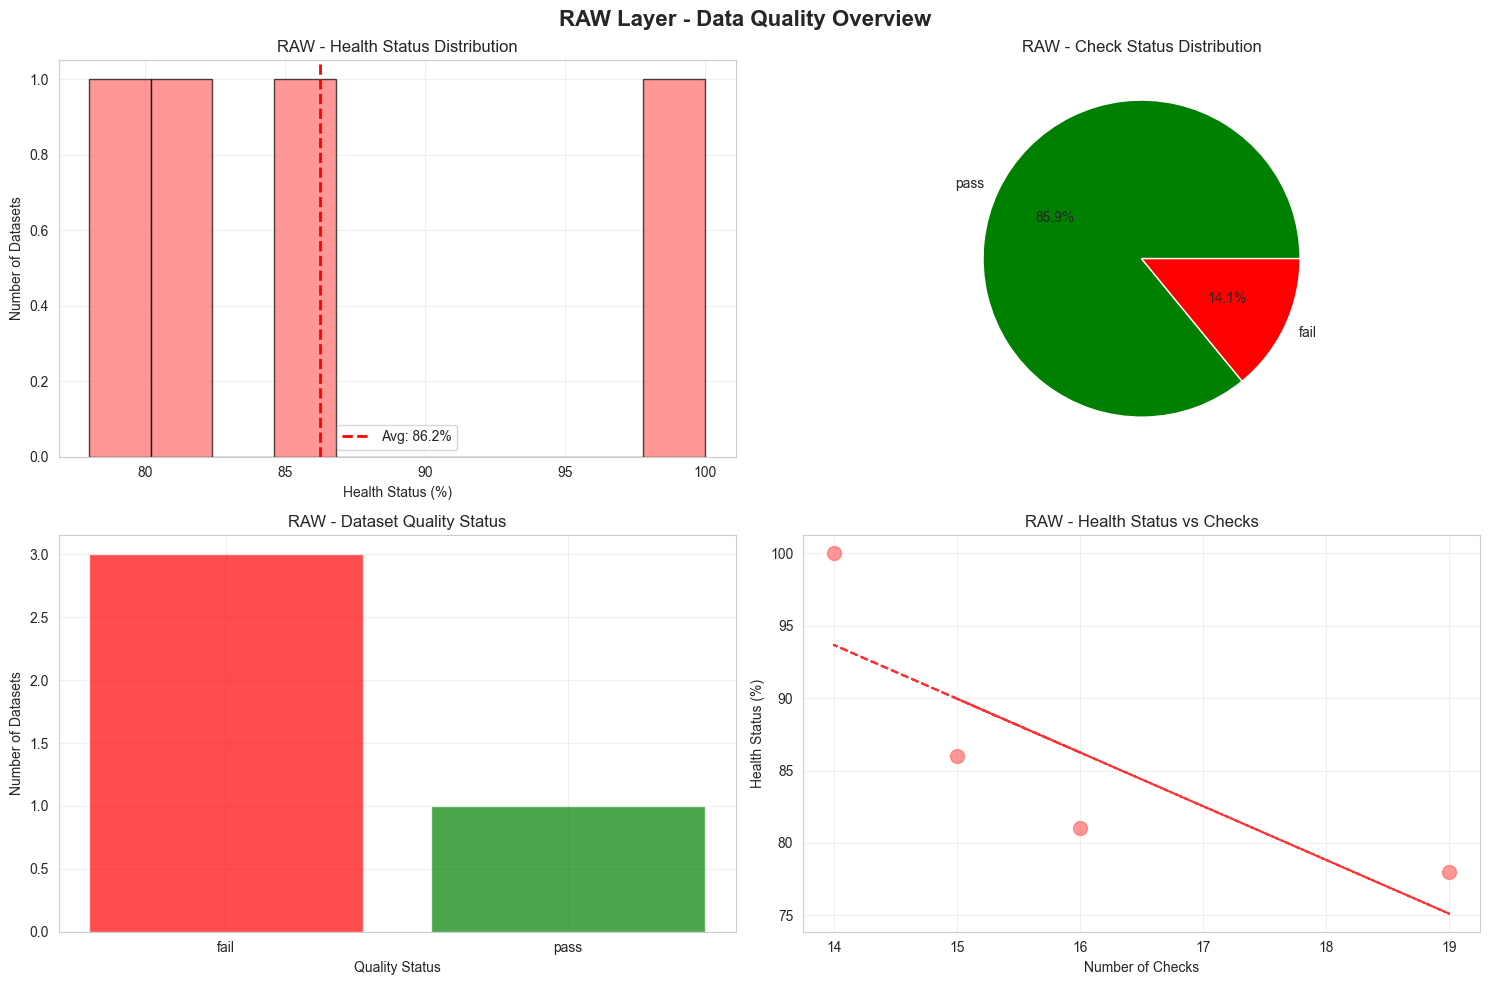


🔍 STAGING LAYER ANALYSIS
📊 Datasets: 4
🔍 Checks: 48
📈 Average Health Status: 93.2%
🔍 Total Checks: 48
⚠️ Total Incidents: 0
✅ Pass Rate: 93.8%
❌ Fail Rate: 6.2%


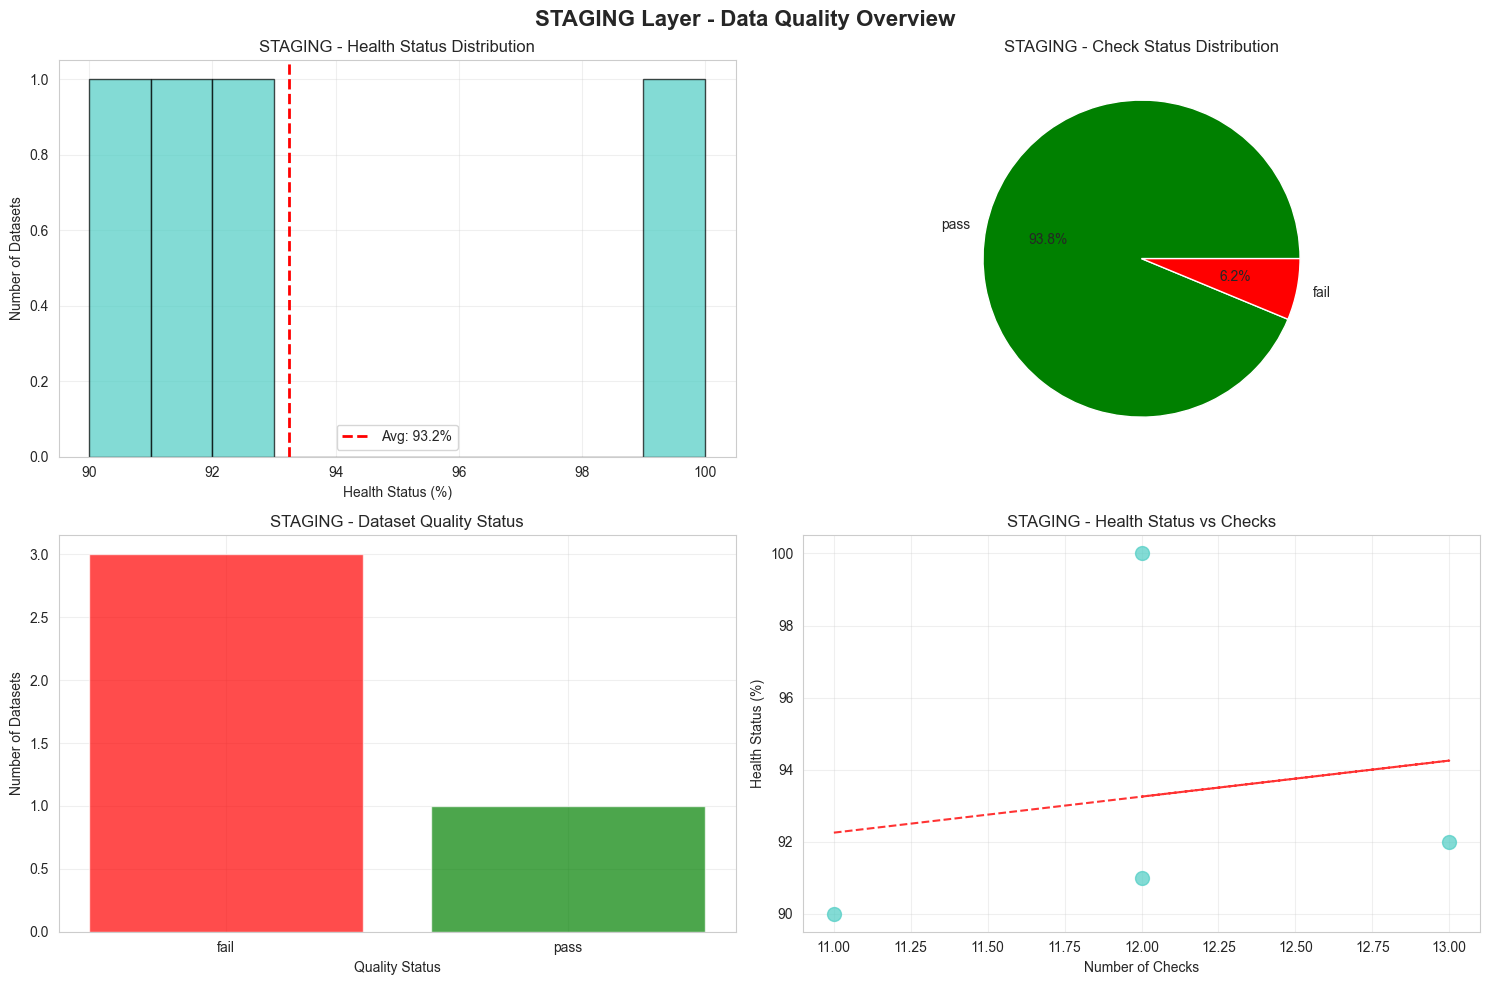


🔍 MART LAYER ANALYSIS
📊 Datasets: 3
🔍 Checks: 40
📈 Average Health Status: 89.0%
🔍 Total Checks: 40
⚠️ Total Incidents: 0
✅ Pass Rate: 87.5%
❌ Fail Rate: 12.5%


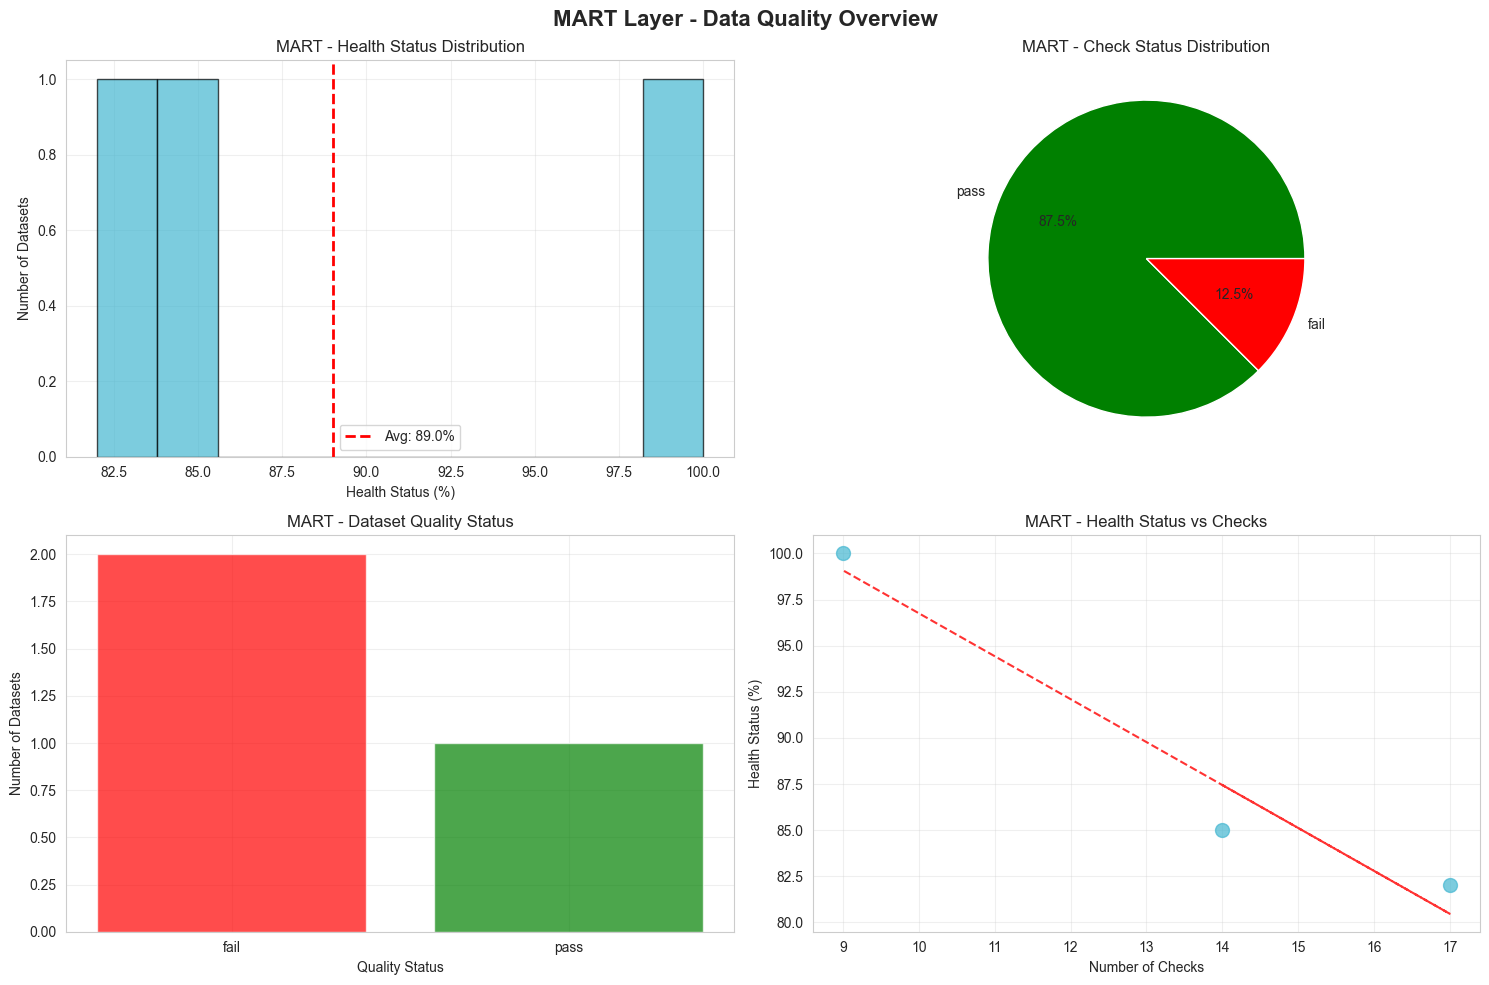


🔍 QUALITY LAYER ANALYSIS
📊 Datasets: 1
🔍 Checks: 7
📈 Average Health Status: 100.0%
🔍 Total Checks: 7
⚠️ Total Incidents: 0
✅ Pass Rate: 100.0%
❌ Fail Rate: 0.0%


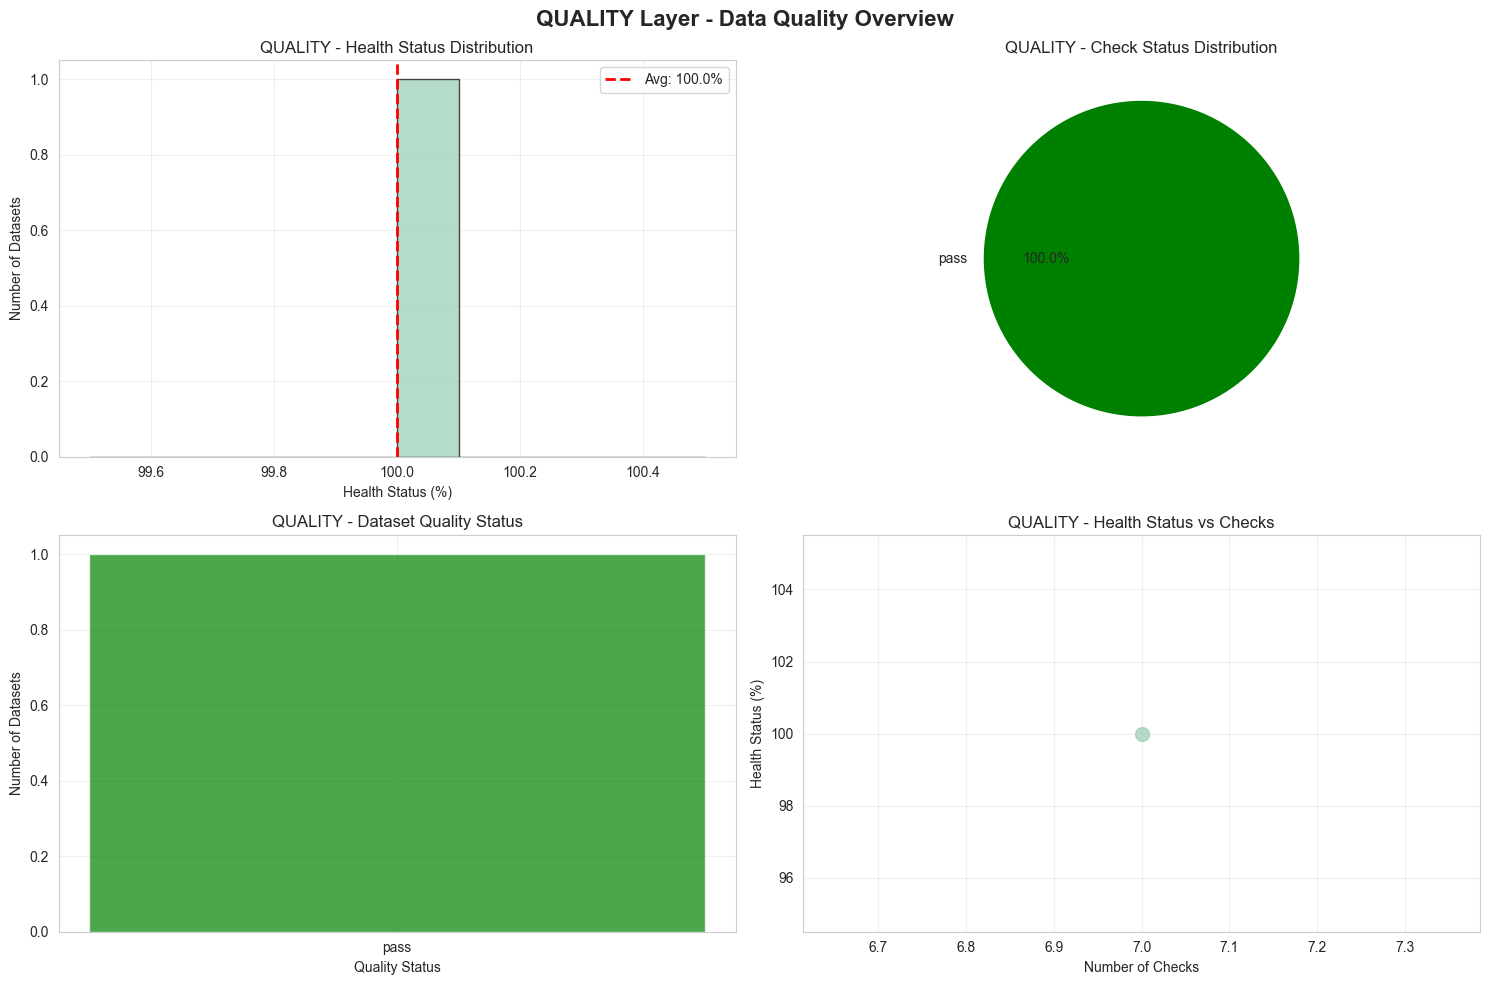


📊 LAYER COMPARISON OVERVIEW


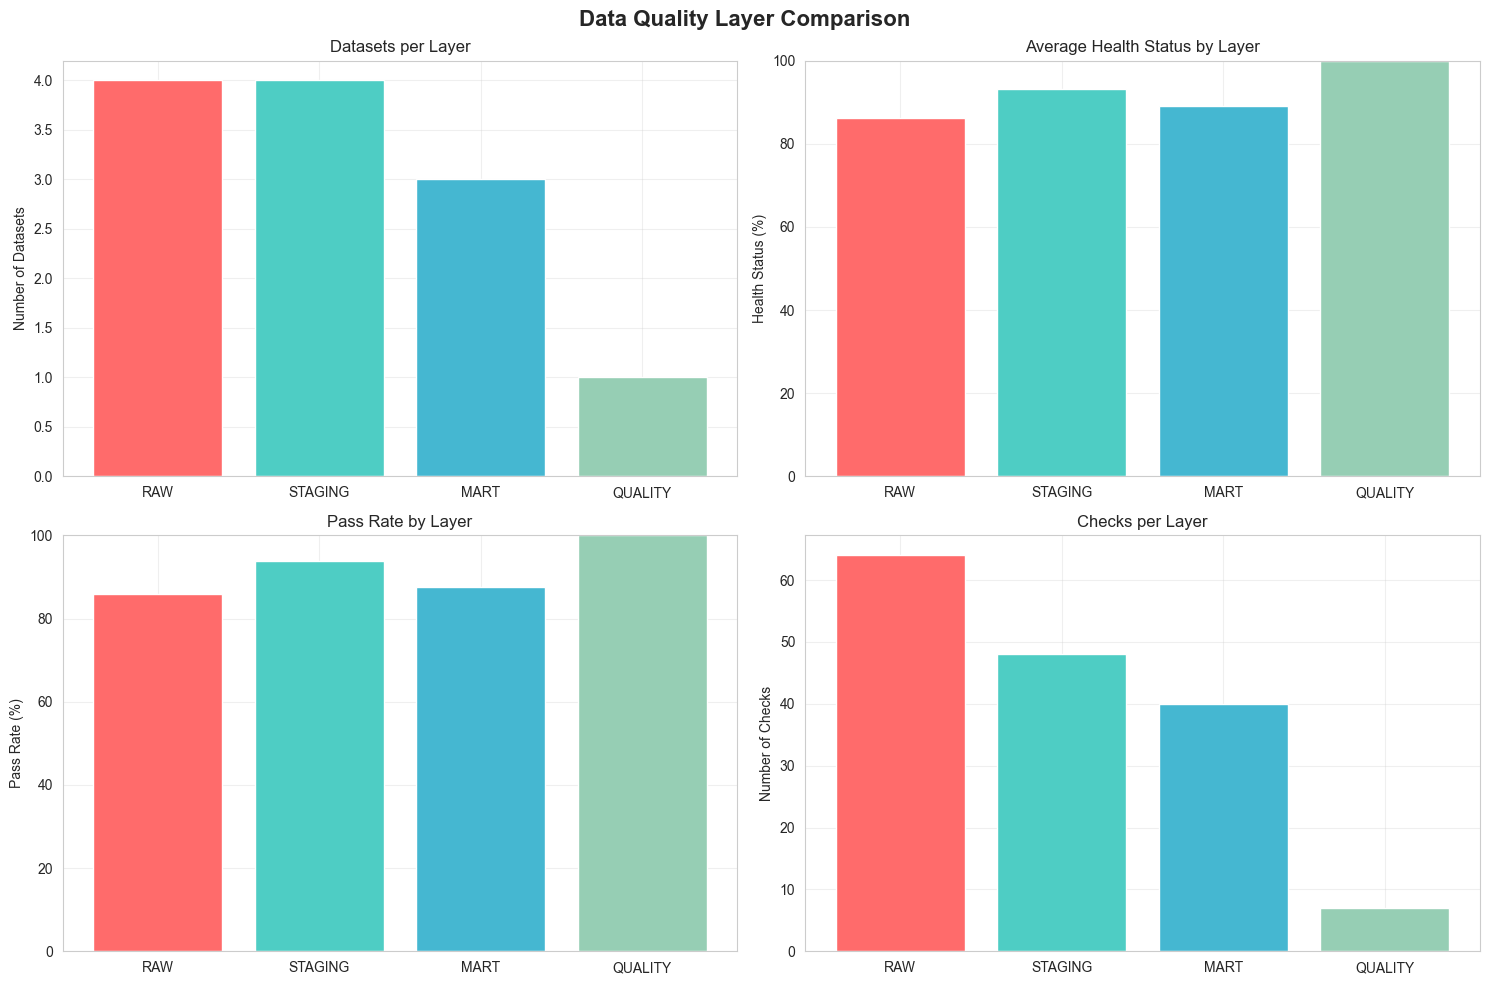


📋 LAYER COMPARISON TABLE:
  layer  datasets  checks  avg_health  pass_rate  fail_rate  total_incidents
    RAW         4      64        86.2       85.9       14.1                0
STAGING         4      48        93.2       93.8        6.2                0
   MART         3      40        89.0       87.5       12.5                0
QUALITY         1       7       100.0      100.0        0.0                0
✅ Layer-specific visualizations created successfully!


In [8]:
# Layer-specific data analysis and visualization
if not datasets_df.empty and not checks_df.empty:
    print("📊 CREATING LAYER-SPECIFIC VISUALIZATIONS")
    print("=" * 50)
    
    # Define layer colors for consistency
    layer_colors = {
        'RAW': '#FF6B6B',      # Red for raw data
        'STAGING': '#4ECDC4',   # Teal for staging
        'MART': '#45B7D1',     # Blue for mart
        'QUALITY': '#96CEB4'    # Green for quality
    }
    
    # Function to create layer-specific analysis
    def analyze_layer(layer_name, layer_datasets, layer_checks):
        print(f"\n🔍 {layer_name} LAYER ANALYSIS")
        print("=" * 40)
        
        if layer_datasets.empty:
            print(f"❌ No datasets found for {layer_name} layer")
            return
        
        print(f"📊 Datasets: {len(layer_datasets)}")
        print(f"🔍 Checks: {len(layer_checks)}")
        
        # Layer-specific metrics
        avg_health = layer_datasets['healthStatus'].mean()
        total_checks = layer_datasets['checks'].sum()
        total_incidents = layer_datasets['incidents'].sum()
        
        if not layer_checks.empty and 'evaluationStatus' in layer_checks.columns:
            pass_rate = (layer_checks['evaluationStatus'] == 'pass').mean() * 100
            fail_rate = (layer_checks['evaluationStatus'] == 'fail').mean() * 100
        else:
            pass_rate = 0
            fail_rate = 0
        
        print(f"📈 Average Health Status: {avg_health:.1f}%")
        print(f"🔍 Total Checks: {total_checks}")
        print(f"⚠️ Total Incidents: {total_incidents}")
        print(f"✅ Pass Rate: {pass_rate:.1f}%")
        print(f"❌ Fail Rate: {fail_rate:.1f}%")
        
        # Create layer-specific visualization
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'{layer_name} Layer - Data Quality Overview', fontsize=16, fontweight='bold')
        
        color = layer_colors.get(layer_name, '#95A5A6')
        
        # 1. Health Status Distribution
        axes[0, 0].hist(layer_datasets['healthStatus'], bins=10, alpha=0.7, color=color, edgecolor='black')
        axes[0, 0].set_title(f'{layer_name} - Health Status Distribution')
        axes[0, 0].set_xlabel('Health Status (%)')
        axes[0, 0].set_ylabel('Number of Datasets')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].axvline(avg_health, color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_health:.1f}%')
        axes[0, 0].legend()
        
        # 2. Check Status (if checks exist)
        if not layer_checks.empty and 'evaluationStatus' in layer_checks.columns:
            status_counts = layer_checks['evaluationStatus'].value_counts()
            colors_pie = ['green' if x == 'pass' else 'red' if x == 'fail' else 'orange' for x in status_counts.index]
            axes[0, 1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=colors_pie)
            axes[0, 1].set_title(f'{layer_name} - Check Status Distribution')
        else:
            axes[0, 1].text(0.5, 0.5, 'No check data available', ha='center', va='center', transform=axes[0, 1].transAxes)
            axes[0, 1].set_title(f'{layer_name} - Check Status Distribution')
        
        # 3. Dataset Quality Status
        if 'dataQualityStatus' in layer_datasets.columns:
            dq_counts = layer_datasets['dataQualityStatus'].value_counts()
            colors_bar = ['green' if x == 'pass' else 'red' if x == 'fail' else 'orange' for x in dq_counts.index]
            axes[1, 0].bar(dq_counts.index, dq_counts.values, color=colors_bar, alpha=0.7)
            axes[1, 0].set_title(f'{layer_name} - Dataset Quality Status')
            axes[1, 0].set_xlabel('Quality Status')
            axes[1, 0].set_ylabel('Number of Datasets')
            axes[1, 0].grid(True, alpha=0.3)
        else:
            axes[1, 0].text(0.5, 0.5, 'No quality status data', ha='center', va='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title(f'{layer_name} - Dataset Quality Status')
        
        # 4. Health vs Checks Scatter
        axes[1, 1].scatter(layer_datasets['checks'], layer_datasets['healthStatus'], alpha=0.7, color=color, s=100)
        axes[1, 1].set_title(f'{layer_name} - Health Status vs Checks')
        axes[1, 1].set_xlabel('Number of Checks')
        axes[1, 1].set_ylabel('Health Status (%)')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add trend line
        if len(layer_datasets) > 1:
            z = np.polyfit(layer_datasets['checks'], layer_datasets['healthStatus'], 1)
            p = np.poly1d(z)
            axes[1, 1].plot(layer_datasets['checks'], p(layer_datasets['checks']), "r--", alpha=0.8)
        
        plt.tight_layout()
        plt.show()
        
        return {
            'layer': layer_name,
            'datasets': len(layer_datasets),
            'checks': len(layer_checks),
            'avg_health': avg_health,
            'pass_rate': pass_rate,
            'fail_rate': fail_rate,
            'total_incidents': total_incidents
        }
    
    # Analyze each layer separately
    layer_analyses = []
    
    # RAW Layer
    raw_datasets = datasets_df[datasets_df['datasource_name'] == 'soda_certification_raw']
    raw_checks = checks_df[checks_df['datasets'].str.contains('|'.join(raw_datasets['id'].astype(str)), na=False)]
    if not raw_datasets.empty:
        layer_analyses.append(analyze_layer('RAW', raw_datasets, raw_checks))
    
    # STAGING Layer
    staging_datasets = datasets_df[datasets_df['datasource_name'] == 'soda_certification_staging']
    staging_checks = checks_df[checks_df['datasets'].str.contains('|'.join(staging_datasets['id'].astype(str)), na=False)]
    if not staging_datasets.empty:
        layer_analyses.append(analyze_layer('STAGING', staging_datasets, staging_checks))
    
    # MART Layer
    mart_datasets = datasets_df[datasets_df['datasource_name'] == 'soda_certification_mart']
    mart_checks = checks_df[checks_df['datasets'].str.contains('|'.join(mart_datasets['id'].astype(str)), na=False)]
    if not mart_datasets.empty:
        layer_analyses.append(analyze_layer('MART', mart_datasets, mart_checks))
    
    # QUALITY Layer
    quality_datasets = datasets_df[datasets_df['datasource_name'] == 'soda_certification_quality']
    quality_checks = checks_df[checks_df['datasets'].str.contains('|'.join(quality_datasets['id'].astype(str)), na=False)]
    if not quality_datasets.empty:
        layer_analyses.append(analyze_layer('QUALITY', quality_datasets, quality_checks))
    
    # Create layer comparison visualization
    if layer_analyses:
        print(f"\n📊 LAYER COMPARISON OVERVIEW")
        print("=" * 40)
        
        # Create comparison DataFrame
        comparison_df = pd.DataFrame(layer_analyses)
        
        # Layer comparison chart
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Data Quality Layer Comparison', fontsize=16, fontweight='bold')
        
        # 1. Datasets per layer
        axes[0, 0].bar(comparison_df['layer'], comparison_df['datasets'], color=[layer_colors.get(layer, '#95A5A6') for layer in comparison_df['layer']])
        axes[0, 0].set_title('Datasets per Layer')
        axes[0, 0].set_ylabel('Number of Datasets')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Health status comparison
        axes[0, 1].bar(comparison_df['layer'], comparison_df['avg_health'], color=[layer_colors.get(layer, '#95A5A6') for layer in comparison_df['layer']])
        axes[0, 1].set_title('Average Health Status by Layer')
        axes[0, 1].set_ylabel('Health Status (%)')
        axes[0, 1].set_ylim(0, 100)
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Pass rate comparison
        axes[1, 0].bar(comparison_df['layer'], comparison_df['pass_rate'], color=[layer_colors.get(layer, '#95A5A6') for layer in comparison_df['layer']])
        axes[1, 0].set_title('Pass Rate by Layer')
        axes[1, 0].set_ylabel('Pass Rate (%)')
        axes[1, 0].set_ylim(0, 100)
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Checks per layer
        axes[1, 1].bar(comparison_df['layer'], comparison_df['checks'], color=[layer_colors.get(layer, '#95A5A6') for layer in comparison_df['layer']])
        axes[1, 1].set_title('Checks per Layer')
        axes[1, 1].set_ylabel('Number of Checks')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Display comparison table
        print("\n📋 LAYER COMPARISON TABLE:")
        print(comparison_df.round(1).to_string(index=False))
        
        print("✅ Layer-specific visualizations created successfully!")
    else:
        print("❌ No layer data found for analysis")
        
else:
    print("❌ Cannot create visualizations - missing data")


📊 CREATING COMPREHENSIVE LAYER DASHBOARD


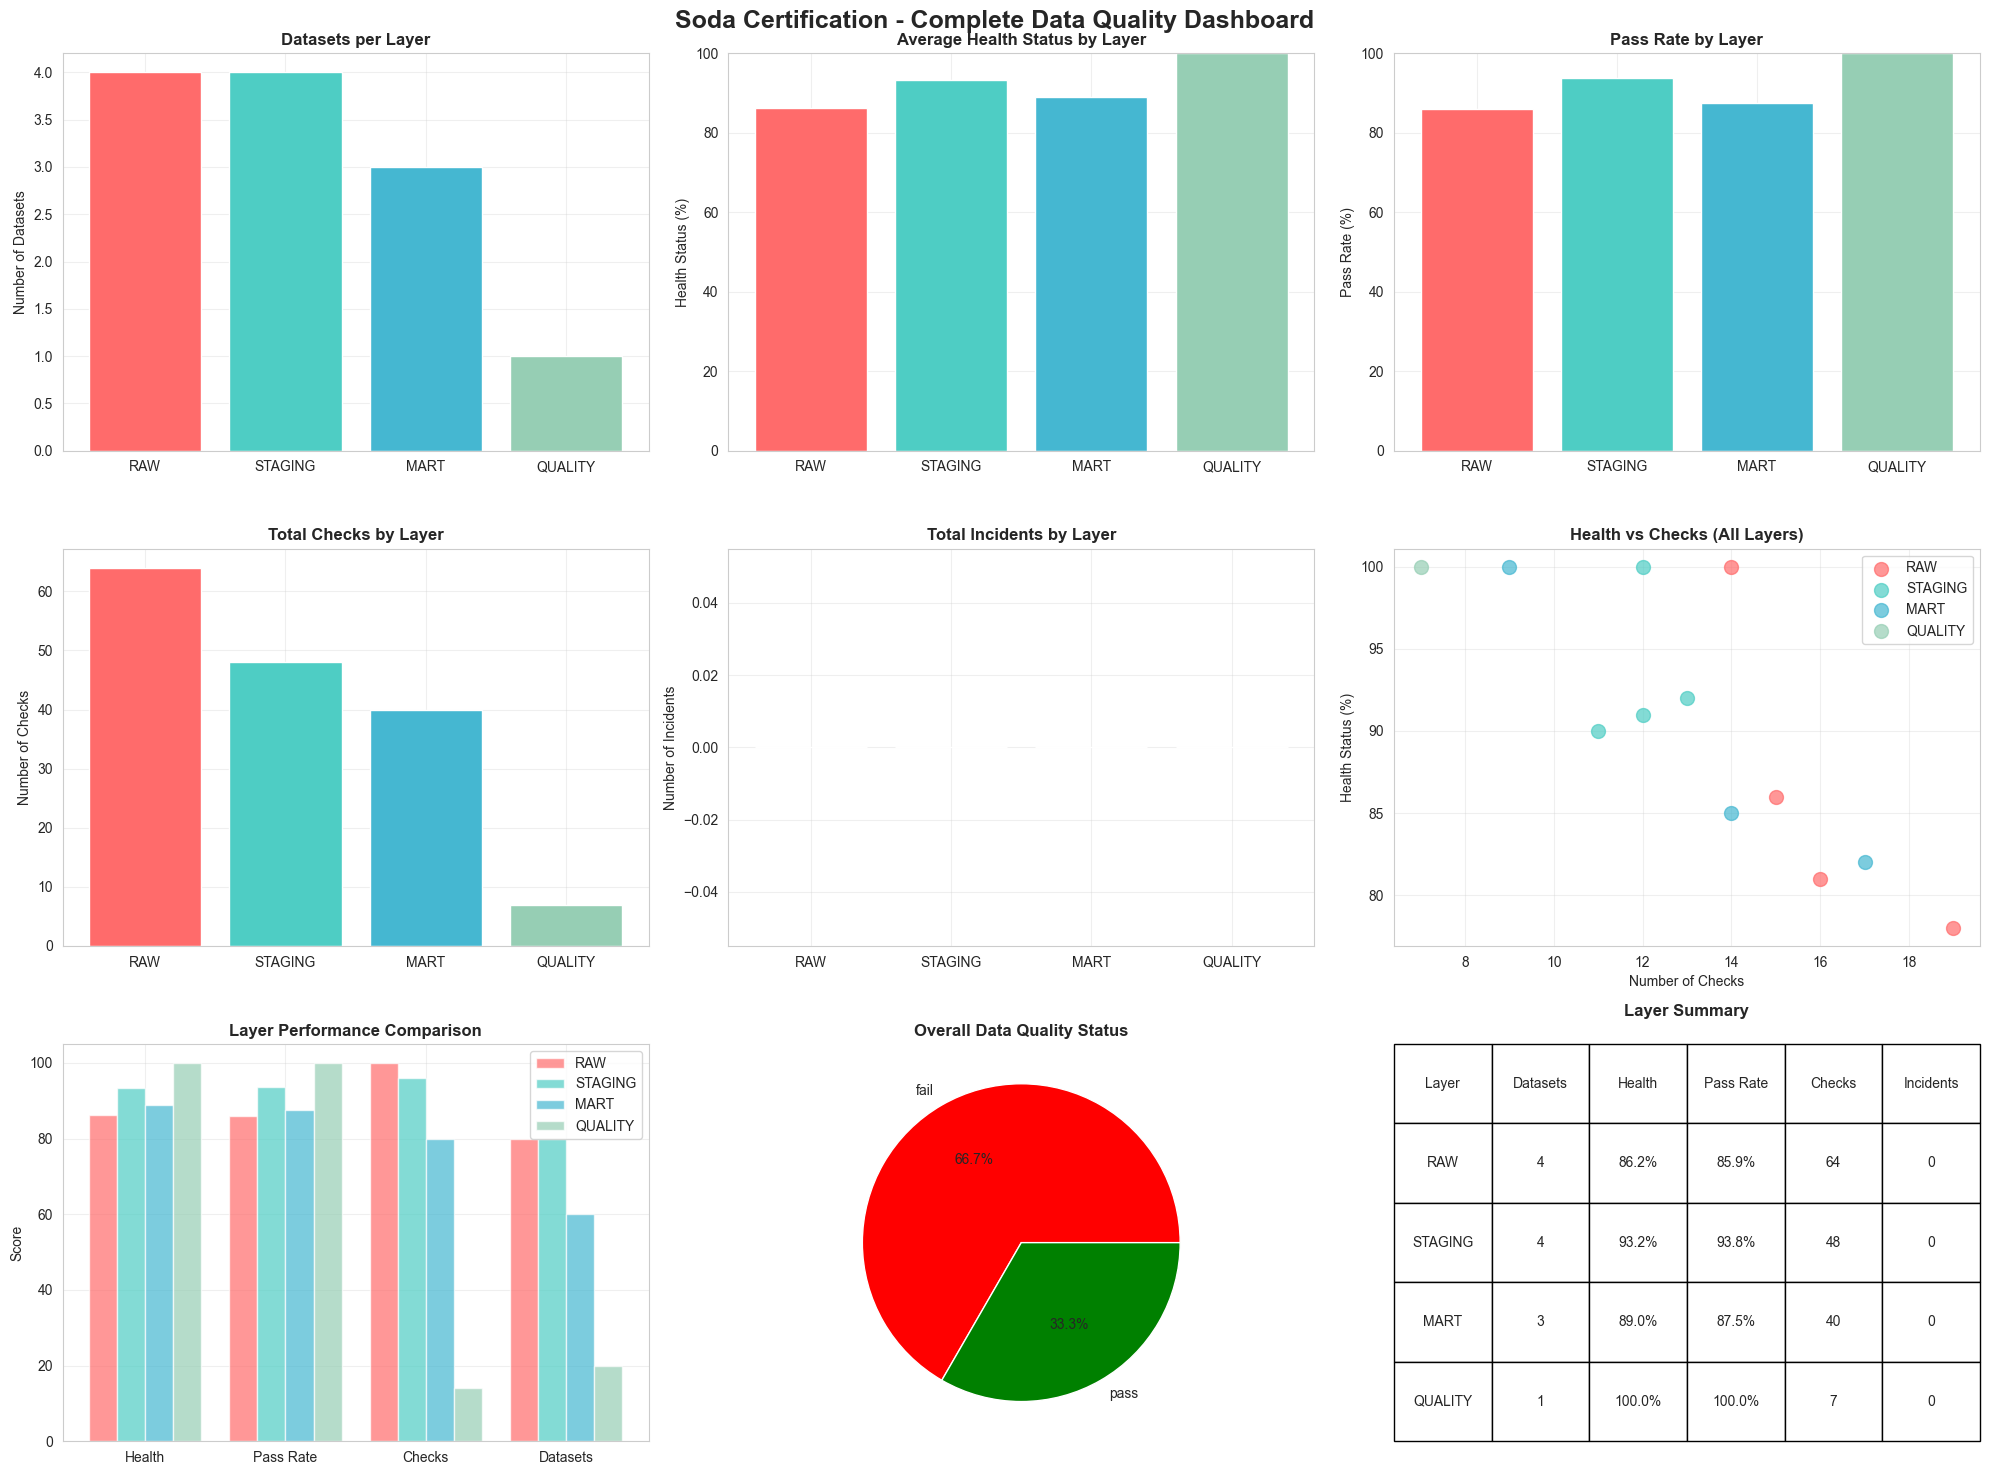


📋 COMPREHENSIVE LAYER SUMMARY:

🔍 RAW LAYER:
   📊 Datasets: 4
   📈 Health: 86.2%
   ✅ Pass Rate: 85.9%
   🔍 Checks: 64
   ⚠️ Incidents: 0

🔍 STAGING LAYER:
   📊 Datasets: 4
   📈 Health: 93.2%
   ✅ Pass Rate: 93.8%
   🔍 Checks: 48
   ⚠️ Incidents: 0

🔍 MART LAYER:
   📊 Datasets: 3
   📈 Health: 89.0%
   ✅ Pass Rate: 87.5%
   🔍 Checks: 40
   ⚠️ Incidents: 0

🔍 QUALITY LAYER:
   📊 Datasets: 1
   📈 Health: 100.0%
   ✅ Pass Rate: 100.0%
   🔍 Checks: 7
   ⚠️ Incidents: 0

✅ Comprehensive dashboard created successfully!


In [9]:
# Create a comprehensive layer summary dashboard
if not datasets_df.empty and not checks_df.empty:
    print("📊 CREATING COMPREHENSIVE LAYER DASHBOARD")
    print("=" * 50)
    
    # Prepare data for each layer
    layers_data = {}
    
    for layer_name in ['RAW', 'STAGING', 'MART', 'QUALITY']:
        layer_datasets = datasets_df[datasets_df['datasource_name'] == f'soda_certification_{layer_name.lower()}']
        layer_checks = checks_df[checks_df['datasets'].str.contains('|'.join(layer_datasets['id'].astype(str)), na=False)]
        
        if not layer_datasets.empty:
            layers_data[layer_name] = {
                'datasets': layer_datasets,
                'checks': layer_checks,
                'avg_health': layer_datasets['healthStatus'].mean(),
                'total_checks': layer_datasets['checks'].sum(),
                'total_incidents': layer_datasets['incidents'].sum(),
                'pass_rate': (layer_checks['evaluationStatus'] == 'pass').mean() * 100 if not layer_checks.empty else 0,
                'fail_rate': (layer_checks['evaluationStatus'] == 'fail').mean() * 100 if not layer_checks.empty else 0
            }
    
    if layers_data:
        # Create comprehensive dashboard
        fig, axes = plt.subplots(3, 3, figsize=(20, 15))
        fig.suptitle('Soda Certification - Complete Data Quality Dashboard', fontsize=18, fontweight='bold')
        
        # Define colors for each layer
        layer_colors = {
            'RAW': '#FF6B6B',      # Red
            'STAGING': '#4ECDC4',   # Teal  
            'MART': '#45B7D1',     # Blue
            'QUALITY': '#96CEB4'    # Green
        }
        
        # 1. Layer Overview - Datasets Count
        layers = list(layers_data.keys())
        dataset_counts = [layers_data[layer]['datasets'].shape[0] for layer in layers]
        axes[0, 0].bar(layers, dataset_counts, color=[layer_colors[layer] for layer in layers])
        axes[0, 0].set_title('Datasets per Layer', fontweight='bold')
        axes[0, 0].set_ylabel('Number of Datasets')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Health Status by Layer
        health_scores = [layers_data[layer]['avg_health'] for layer in layers]
        axes[0, 1].bar(layers, health_scores, color=[layer_colors[layer] for layer in layers])
        axes[0, 1].set_title('Average Health Status by Layer', fontweight='bold')
        axes[0, 1].set_ylabel('Health Status (%)')
        axes[0, 1].set_ylim(0, 100)
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Pass Rate by Layer
        pass_rates = [layers_data[layer]['pass_rate'] for layer in layers]
        axes[0, 2].bar(layers, pass_rates, color=[layer_colors[layer] for layer in layers])
        axes[0, 2].set_title('Pass Rate by Layer', fontweight='bold')
        axes[0, 2].set_ylabel('Pass Rate (%)')
        axes[0, 2].set_ylim(0, 100)
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Total Checks by Layer
        total_checks = [layers_data[layer]['total_checks'] for layer in layers]
        axes[1, 0].bar(layers, total_checks, color=[layer_colors[layer] for layer in layers])
        axes[1, 0].set_title('Total Checks by Layer', fontweight='bold')
        axes[1, 0].set_ylabel('Number of Checks')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Incidents by Layer
        incidents = [layers_data[layer]['total_incidents'] for layer in layers]
        axes[1, 1].bar(layers, incidents, color=[layer_colors[layer] for layer in layers])
        axes[1, 1].set_title('Total Incidents by Layer', fontweight='bold')
        axes[1, 1].set_ylabel('Number of Incidents')
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Health vs Checks Scatter (All Layers)
        for layer in layers:
            layer_datasets = layers_data[layer]['datasets']
            axes[1, 2].scatter(layer_datasets['checks'], layer_datasets['healthStatus'], 
                             alpha=0.7, s=100, color=layer_colors[layer], label=layer)
        axes[1, 2].set_title('Health vs Checks (All Layers)', fontweight='bold')
        axes[1, 2].set_xlabel('Number of Checks')
        axes[1, 2].set_ylabel('Health Status (%)')
        axes[1, 2].grid(True, alpha=0.3)
        axes[1, 2].legend()
        
        # 7. Layer Performance Radar Chart (simplified as bar chart)
        metrics = ['Health', 'Pass Rate', 'Checks', 'Datasets']
        layer_metrics = {}
        for layer in layers:
            layer_metrics[layer] = [
                layers_data[layer]['avg_health'],
                layers_data[layer]['pass_rate'],
                min(layers_data[layer]['total_checks'] * 2, 100),  # Scale checks
                min(layers_data[layer]['datasets'].shape[0] * 20, 100)  # Scale datasets
            ]
        
        x = np.arange(len(metrics))
        width = 0.2
        for i, layer in enumerate(layers):
            axes[2, 0].bar(x + i*width, layer_metrics[layer], width, 
                          label=layer, color=layer_colors[layer], alpha=0.7)
        axes[2, 0].set_title('Layer Performance Comparison', fontweight='bold')
        axes[2, 0].set_ylabel('Score')
        axes[2, 0].set_xticks(x + width * 1.5)
        axes[2, 0].set_xticklabels(metrics)
        axes[2, 0].legend()
        axes[2, 0].grid(True, alpha=0.3)
        
        # 8. Data Quality Status Distribution (All Layers)
        all_dq_status = []
        for layer in layers:
            layer_datasets = layers_data[layer]['datasets']
            if 'dataQualityStatus' in layer_datasets.columns:
                all_dq_status.extend(layer_datasets['dataQualityStatus'].tolist())
        
        if all_dq_status:
            dq_counts = pd.Series(all_dq_status).value_counts()
            colors = ['green' if x == 'pass' else 'red' if x == 'fail' else 'orange' for x in dq_counts.index]
            axes[2, 1].pie(dq_counts.values, labels=dq_counts.index, autopct='%1.1f%%', colors=colors)
            axes[2, 1].set_title('Overall Data Quality Status', fontweight='bold')
        else:
            axes[2, 1].text(0.5, 0.5, 'No quality status data', ha='center', va='center', transform=axes[2, 1].transAxes)
            axes[2, 1].set_title('Overall Data Quality Status', fontweight='bold')
        
        # 9. Layer Summary Table
        axes[2, 2].axis('off')
        summary_data = []
        for layer in layers:
            summary_data.append([
                layer,
                f"{layers_data[layer]['datasets'].shape[0]}",
                f"{layers_data[layer]['avg_health']:.1f}%",
                f"{layers_data[layer]['pass_rate']:.1f}%",
                f"{layers_data[layer]['total_checks']}",
                f"{layers_data[layer]['total_incidents']}"
            ])
        
        table_data = pd.DataFrame(summary_data, columns=['Layer', 'Datasets', 'Health', 'Pass Rate', 'Checks', 'Incidents'])
        
        table = axes[2, 2].table(cellText=table_data.values, colLabels=table_data.columns,
                               cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        axes[2, 2].set_title('Layer Summary', fontweight='bold', pad=20)
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print("\n📋 COMPREHENSIVE LAYER SUMMARY:")
        print("=" * 50)
        for layer in layers:
            data = layers_data[layer]
            print(f"\n🔍 {layer} LAYER:")
            print(f"   📊 Datasets: {data['datasets'].shape[0]}")
            print(f"   📈 Health: {data['avg_health']:.1f}%")
            print(f"   ✅ Pass Rate: {data['pass_rate']:.1f}%")
            print(f"   🔍 Checks: {data['total_checks']}")
            print(f"   ⚠️ Incidents: {data['total_incidents']}")
        
        print("\n✅ Comprehensive dashboard created successfully!")
    else:
        print("❌ No layer data available for dashboard")
else:
    print("❌ Cannot create dashboard - missing data")


In [10]:
# Export summary for external use
if not datasets_df.empty and not checks_df.empty:
    print("💾 EXPORTING SUMMARY DATA")
    print("=" * 30)
    
    # Create summary statistics
    summary_data = {
        'metric': [
            'Total Datasets',
            'Total Checks', 
            'Average Health Status',
            'Total Incidents',
            'Pass Rate',
            'Fail Rate',
            'Data Quality Score'
        ],
        'value': [
            len(datasets_df),
            len(checks_df),
            f"{datasets_df['healthStatus'].mean():.1f}%",
            int(datasets_df['incidents'].sum()),
            f"{(checks_df['evaluationStatus'] == 'pass').mean() * 100:.1f}%",
            f"{(checks_df['evaluationStatus'] == 'fail').mean() * 100:.1f}%",
            f"{((checks_df['evaluationStatus'] == 'pass').sum() / len(checks_df)) * 100:.1f}%"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    
    # Save summary
    summary_file = os.path.join(output_dir, 'analysis_summary.csv')
    summary_df.to_csv(summary_file, index=False)
    print(f"✅ Summary saved to: {summary_file}")
    
    # Display summary table
    print("\n📋 SUMMARY METRICS:")
    print(summary_df.to_string(index=False))
    
    print(f"\n🎯 Key Insights:")
    print(f"   • {len(datasets_df)} datasets monitored")
    print(f"   • {len(checks_df)} quality checks active")
    print(f"   • {datasets_df['healthStatus'].mean():.1f}% average health score")
    print(f"   • {((checks_df['evaluationStatus'] == 'pass').sum() / len(checks_df)) * 100:.1f}% check pass rate")
    
else:
    print("❌ Cannot create summary - missing data")


💾 EXPORTING SUMMARY DATA
✅ Summary saved to: soda_dump_output/analysis_summary.csv

📋 SUMMARY METRICS:
               metric value
       Total Datasets    12
         Total Checks   159
Average Health Status 90.4%
      Total Incidents     0
            Pass Rate 89.3%
            Fail Rate 10.7%
   Data Quality Score 89.3%

🎯 Key Insights:
   • 12 datasets monitored
   • 159 quality checks active
   • 90.4% average health score
   • 89.3% check pass rate
